# Assignment 8 (10 Points): Pandas

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
flights = pd.read_csv('data/flights.csv')
airports = pd.read_csv('data/airports.csv')

### Q1 (3 points): Reverse engineer the following dataframe by merging the flights and airports datasets.

In [22]:
#merged data set with origin initials and origin name
merged=flights[['origin','dest','tailnum']].merge(airports[['name','faa']],left_on='origin',right_on='faa')

In [23]:
#drop faa
merged1=merged.drop('faa',axis='columns').rename(columns={'name':'origin_name'})

In [27]:
#merged data set with destination initials and destination name
merged2=flights[['origin','dest','tailnum']].merge(airports[['name','faa']],left_on='dest',right_on='faa')

In [28]:
#drop faa
merged3=merged2.drop('faa',axis='columns').rename(columns={'name':'dest_name'})

In [57]:
#merged origin name and destination name
#doesn't include NAs
final=merged1.merge(merged3.drop_duplicates(), how='left')
final

,origin,dest,tailnum,origin_name,dest_name
0,EWR,IAH,N14228,Newark Liberty Intl,George Bush Intercontinental
1,EWR,ORD,N39463,Newark Liberty Intl,Chicago Ohare Intl
2,EWR,FLL,N516JB,Newark Liberty Intl,Fort Lauderdale Hollywood Intl
3,EWR,SFO,N53441,Newark Liberty Intl,San Francisco Intl
4,EWR,LAS,N76515,Newark Liberty Intl,Mc Carran Intl
...,...,...,...,...,...
336771,JFK,BUF,N281JB,John F Kennedy Intl,Buffalo Niagara Intl
336772,JFK,ROC,N346JB,John F Kennedy Intl,Greater Rochester Intl
336773,JFK,BOS,N565JB,John F Kennedy Intl,General Edward Lawrence Logan Intl
336774,JFK,PSE,N516JB,John F Kennedy Intl,NaN


,origin,dest,tailnum,origin_name,dest_name
0,EWR,IAH,N14228,Newark Liberty Intl,George Bush Intercontinental
1,EWR,IAH,N37408,Newark Liberty Intl,George Bush Intercontinental
2,EWR,IAH,N12216,Newark Liberty Intl,George Bush Intercontinental
3,EWR,IAH,N667UA,Newark Liberty Intl,George Bush Intercontinental
4,EWR,IAH,N39418,Newark Liberty Intl,George Bush Intercontinental
...,...,...,...,...,...
339583,NaN,NaN,NaN,NaN,Black Rock
339584,NaN,NaN,NaN,NaN,New Haven Rail Station
339585,NaN,NaN,NaN,NaN,Wilmington Amtrak Station
339586,NaN,NaN,NaN,NaN,Washington Union Station


### Q2 (4 points): Use the resulting dataframe from Q1 to reverse engineer the following results (i.e., sorting the count of flights between the origin and destination airports).

In [ ]:
#group by origin_name,dest_name, and tailnum
#sort table

In [90]:
Q2=final.groupby(['origin_name','dest_name'])[['tailnum']].agg(['count']).rename(columns={'count':''})

In [92]:
Q2.sort_values(by='tailnum',ascending=False)

tailnum
                                                           
origin_name         dest_name                              
John F Kennedy Intl Los Angeles Intl                  11237
La Guardia          Hartsfield Jackson Atlanta Intl   10262
                    Chicago Ohare Intl                 8717
John F Kennedy Intl San Francisco Intl                 8174
La Guardia          Charlotte Douglas Intl             6114
...                                                     ...
John F Kennedy Intl Memphis Intl                          1
                    Lambert St Louis Intl                 1
                    Birmingham Intl                       1
La Guardia          Blue Grass                            1
Newark Liberty Intl La Guardia                            0

[217 rows x 1 columns]

tailnum
origin_name         dest_name                               
John F Kennedy Intl Los Angeles Intl                   11237
La Guardia          Hartsfield Jackson Atlanta Intl    10262
                    Chicago Ohare Intl                  8717
John F Kennedy Intl San Francisco Intl                  8174
La Guardia          Charlotte Douglas Intl              6114
...                                                      ...
John F Kennedy Intl Memphis Intl                           1
                    Lambert St Louis Intl                  1
                    Birmingham Intl                        1
La Guardia          Blue Grass                             1
Newark Liberty Intl La Guardia                             0

[217 rows x 1 columns]

### Q3 (3 points): Compute and plot the rolling mean and standard deviation of the price ratio between GOOG and NASDAQ.

- UCB stands for Upper Confidence Bound and is computed using mean + std.
- LCB stands for Lower Confidence Bound and is computed using mean - std.

In [4]:
GOOG = pd.read_csv('data/GOOG.csv', index_col = 0, parse_dates = ['Date'])
NASDAQ = pd.read_csv('data/NASDAQ.csv', index_col = 0, parse_dates = ['Date'])

GOOG = GOOG['Close']
NASDAQ = NASDAQ['Close']

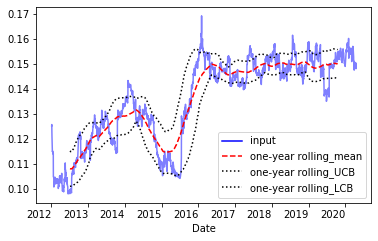

In [76]:
#plot data
#set stylying (line shape, line color)
#adjust lines and x axis's rotation
ratio=GOOG/NASDAQ

rolling = ratio.rolling(252,center=True)

data = pd.DataFrame({'input': ratio,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_UCB': rolling.mean() + 1.0*rolling.std(),
                     'one-year rolling_LCB': rolling.mean() - 1.0*rolling.std()})

ax=data.plot(style=['b-', 'r--', 'k:', 'k:'])

ax.lines[0].set_alpha(0.5)

ax=plt.xticks(rotation=0)


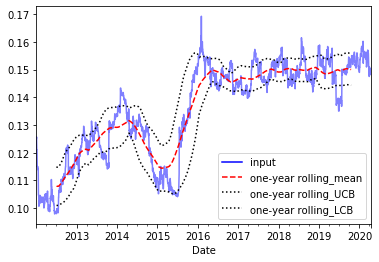